# Data

https://www.kaggle.com/datasets/alanvourch/tmdb-movies-daily-updates

# columns
Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'popularity', 'genres',
       'production_companies', 'production_countries', 'cast', 'director',
       'director_of_photography', 'writers', 'producers', 'music_composer',
       'imdb_rating', 'imdb_votes', 'year', 'month', 'day', 'profit_ratio',
       'genres_parsed', 'genre_Action', 'genre_Adventure', 'genre_Animation',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Family', 'genre_Fantasy', 'genre_History', 'genre_Horror',
       'genre_Music', 'genre_Mystery', 'genre_Romance',
       'genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller',
       'genre_War', 'genre_Western', 'log_budget', 'log_revenue',
       'log_profit_ratio'],
      dtype='object')

# Required columns
    - ko: id, 제목, 평점(둘다), 관객수, 평점, 참가한 수, 장르, 릴리즈 데이트 
    - columns: id, title, vote_average, genre, release_date, 
    - add : revenue(Box office revenue in USD):평점으로는 판단할 수 없는 실제 수익(인기정도), 
            budget(Production budget in USD):인기 많은 영화는 예산이 어느정도 투자되는가,
            

### *참고할 그래프 종류

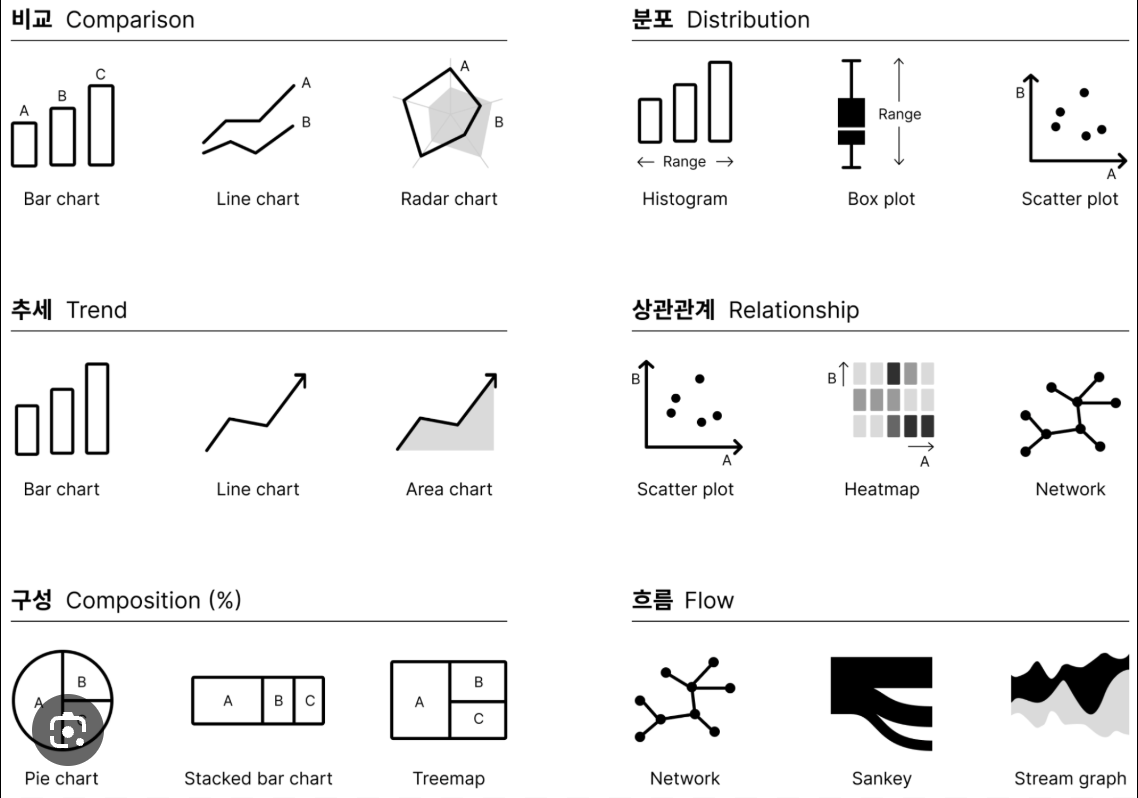

# ⭐️분석 시작

### 1. 필요한 컬럼만 남기기 

In [1]:
import pandas as pd
import os

# --- 설정 (Configuration) ---

# 입력 파일 경로 (사용자가 제공한 Kaggle 경로)
INPUT_FILE_PATH = '/kaggle/input/25-2-bigdata-practice/TMDB_cleaned_data.csv'

# 출력 파일 경로 (사용자가 제공한 Kaggle 작업 경로)
OUTPUT_DIR = '/kaggle/working/'
OUTPUT_FILE_NAME = 'selected_tmdb_data.csv'
OUTPUT_FILE_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILE_NAME)

# 선택할 컬럼 목록
REQUIRED_COLUMNS = [
    'id',
    'title',
    'budget',
    'popularity',
    'genres',
    'production_companies',
    'production_countries',
    'cast',
    'director',
    'writers',
    'year',
    'month'
]

print("--- TMDB 데이터 컬럼 선택 스크립트 시작 ---")
print(f"입력 파일: {INPUT_FILE_PATH}")

try:
    # 1. CSV 파일 읽기
    # read_csv에서 usecols 매개변수를 사용하여 필요한 컬럼만 효율적으로 읽어옵니다.
    df = pd.read_csv(INPUT_FILE_PATH, usecols=REQUIRED_COLUMNS)
    print(f"원본 데이터 로드 완료. (총 {len(df)} 행)")

    # 2. 필요한 컬럼만 선택
    # usecols를 사용했으므로 이 단계는 사실상 컬럼 순서 재배열 역할만 합니다.
    df_selected = df[REQUIRED_COLUMNS]
    
    # 3. 결과 DataFrame 확인
    print("\n선택된 컬럼의 DataFrame 미리보기:")
    print(df_selected.head())
    print(f"\nDataFrame 정보: {df_selected.shape} (행, 열)")
    print(f"선택된 컬럼 목록: {list(df_selected.columns)}")
    
    # 4. 새로운 CSV 파일로 저장 (Kaggle working 디렉토리에 저장)
    # index=False 옵션을 사용하여 DataFrame 인덱스는 파일에 저장하지 않습니다.
    df_selected.to_csv(OUTPUT_FILE_PATH, index=False)
    
    print(f"\n✅ 성공적으로 완료되었습니다!")
    print(f"결과 파일이 다음 위치에 저장되었습니다: {OUTPUT_FILE_PATH}")

except FileNotFoundError:
    print(f"\n❌ 오류: 파일을 찾을 수 없습니다. 경로를 다시 확인해 주세요: {INPUT_FILE_PATH}")
except ValueError as e:
    print(f"\n❌ 오류: 지정된 컬럼 중 일부가 데이터 파일에 없습니다. 오류 내용: {e}")
    print(f"요청된 컬럼: {REQUIRED_COLUMNS}")
except Exception as e:
    print(f"\n❌ 예기치 않은 오류가 발생했습니다: {e}")

print("\n--- TMDB 데이터 컬럼 선택 스크립트 종료 ---")


--- TMDB 데이터 컬럼 선택 스크립트 시작 ---
입력 파일: /kaggle/input/25-2-bigdata-practice/TMDB_cleaned_data.csv
원본 데이터 로드 완료. (총 4156 행)

선택된 컬럼의 DataFrame 미리보기:
       id                    title      budget  popularity  \
0   43615  Lula, the Son of Brazil   9500000.0      1.9972   
1  676945             La Despedida    300000.0      0.2200   
2   19901              Daybreakers  20000000.0      5.0070   
3   25195                Leap Year  19000000.0      6.2332   
4   29888           Dulha Mil Gaya   5600000.0      2.0790   

                             genres  \
0                    Drama, History   
1                            Comedy   
2  Action, Fantasy, Science Fiction   
3                   Romance, Comedy   
4            Comedy, Drama, Romance   

                                production_companies  \
0  LC Barreto, Filmes do Equador, InterVideo Prod...   
1  Panda Filmes, Malicia producciones, B. Iarden ...   
2  Lionsgate, Pictures in Paradise, Pacific Film ...   
3  Birnbaum/Barber Pro

### 2. 여러 장르를 행으로 나눠 저장/ 결측치 제거 

In [3]:
import pandas as pd
import os

# --- 설정 (Configuration) ---

# 이전 단계에서 저장된 파일 경로 (입력 파일)
INPUT_FILE_PATH = '/kaggle/working/selected_tmdb_data.csv'

# 최종 출력 파일 경로
OUTPUT_DIR = '/kaggle/working/'
OUTPUT_FILE_NAME = 'final_processed_tmdb_data_exploded.csv' # 파일 이름 변경
OUTPUT_FILE_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILE_NAME)

# 쉼표로 구분된 값을 개별 행으로 분리할 컬럼 목록 (Explode 대상)
COLUMNS_TO_EXPLODE = [
    'genres',
    'production_countries',
    'director',
    'writers'
]

print("--- 데이터 전처리 및 Explode 스크립트 시작 ---")
print(f"입력 파일: {INPUT_FILE_PATH}")

try:
    # 1. 데이터 로드
    df = pd.read_csv(INPUT_FILE_PATH)
    initial_rows = len(df)
    print(f"데이터 로드 완료. 초기 행 수: {initial_rows}")

    # 2. 결측치 (NaN) 제거
    # 데이터프레임의 어떤 컬럼이라도 결측치가 있는 행은 모두 제거합니다.
    df_cleaned = df.dropna().copy()
    rows_after_dropna = len(df_cleaned)
    print(f"✅ 결측치 제거 완료. 제거된 행: {initial_rows - rows_after_dropna}, 남은 행: {rows_after_dropna}")
    
    # 결측치 제거 후에도 데이터가 남아있는지 확인
    if df_cleaned.empty:
        print("경고: 결측치 제거 후 데이터가 비어있습니다. 스크립트를 종료합니다.")
        # 종료 대신 빈 파일을 생성할 수도 있지만, 여기서는 오류 메시지를 출력합니다.
        exit()

    # 3. Explode할 컬럼 전처리 및 분리 (Exploding)
    df_processed = df_cleaned.copy()
    
    for col in COLUMNS_TO_EXPLODE:
        # 3.1. 모든 값을 문자열로 변환하고 양쪽 공백 제거
        df_processed.loc[:, col] = df_processed[col].astype(str).str.strip()
        
        # 3.2. 쉼표(,)를 기준으로 분리하여 리스트 형태로 변환
        # .str.split(',')는 문자열을 리스트로 만듭니다.
        df_processed.loc[:, col] = df_processed[col].str.split(',')
        
        # 3.3. 리스트의 각 요소를 개별 행으로 분리 (Explode)
        df_processed = df_processed.explode(col)
        
        # 3.4. Explode 후 발생할 수 있는 추가 공백 제거
        df_processed.loc[:, col] = df_processed[col].str.strip()
        
        # 3.5. 분리된 값이 빈 문자열이거나 'None', 'Unknown'인 경우의 행 제거 
        # (데이터를 깔끔하게 유지하기 위한 추가 단계)
        df_processed = df_processed[df_processed[col] != ''].copy()
        df_processed = df_processed[df_processed[col] != 'None'].copy()
        df_processed = df_processed[df_processed[col] != 'Unknown'].copy()
        
        print(f"   > '{col}' 컬럼 Explode 완료. 현재 행 수: {len(df_processed)}")


    # 4. 최종 결과 확인
    final_rows = len(df_processed)
    print(f"\n최종 처리된 데이터의 행 수: {final_rows}")
    print("\n최종 DataFrame (Explode 적용) 미리보기:")
    # Explode된 컬럼을 포함하여 출력 (예시로 genres)
    print(df_processed[['id', 'title', 'genres', 'director']].head())
    
    # 5. 새로운 CSV 파일로 저장
    df_processed.to_csv(OUTPUT_FILE_PATH, index=False)
    
    print(f"\n✅ 데이터 전처리 및 Explode 작업이 이전 방식으로 성공적으로 복원되었습니다!")
    print(f"결과 파일이 다음 위치에 저장되었습니다: {OUTPUT_FILE_PATH}")

except FileNotFoundError:
    print(f"\n❌ 오류: 이전 단계의 입력 파일({INPUT_FILE_PATH})을 찾을 수 없습니다. 경로를 확인해 주세요.")
except Exception as e:
    print(f"\n❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")


--- 데이터 전처리 및 Explode 스크립트 시작 ---
입력 파일: /kaggle/working/selected_tmdb_data.csv
데이터 로드 완료. 초기 행 수: 4156
✅ 결측치 제거 완료. 제거된 행: 175, 남은 행: 3981
   > 'genres' 컬럼 Explode 완료. 현재 행 수: 9747
   > 'production_countries' 컬럼 Explode 완료. 현재 행 수: 15624
   > 'director' 컬럼 Explode 완료. 현재 행 수: 16988
   > 'writers' 컬럼 Explode 완료. 현재 행 수: 45360

최종 처리된 데이터의 행 수: 45360

최종 DataFrame (Explode 적용) 미리보기:
      id                    title genres          director
0  43615  Lula, the Son of Brazil  Drama  Marcelo Santiago
0  43615  Lula, the Son of Brazil  Drama  Marcelo Santiago
0  43615  Lula, the Son of Brazil  Drama  Marcelo Santiago
0  43615  Lula, the Son of Brazil  Drama     Fábio Barreto
0  43615  Lula, the Son of Brazil  Drama     Fábio Barreto

✅ 데이터 전처리 및 Explode 작업이 이전 방식으로 성공적으로 복원되었습니다!
결과 파일이 다음 위치에 저장되었습니다: /kaggle/working/final_processed_tmdb_data_exploded.csv

--- 스크립트 종료 ---


### 3. 장르별 인기 동향 시각화 
라인 차트(시간에 따른 추세)와 누적 막대 그래프(시기별 비교)

--- 장르별 인기 동향 시각화 스크립트 시작 ---
입력 파일: /kaggle/working/final_processed_tmdb_data_exploded.csv
경고: NanumGothic 폰트가 시스템에 설치되어 있지 않을 수 있습니다. 폰트를 설치하거나 다른 폰트 이름을 사용해 주세요.
데이터 로드 완료. 총 행 수: 45360

[1/2] 시간의 흐름에 따른 장르별 인기도 추세 분석 (라인 차트)...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

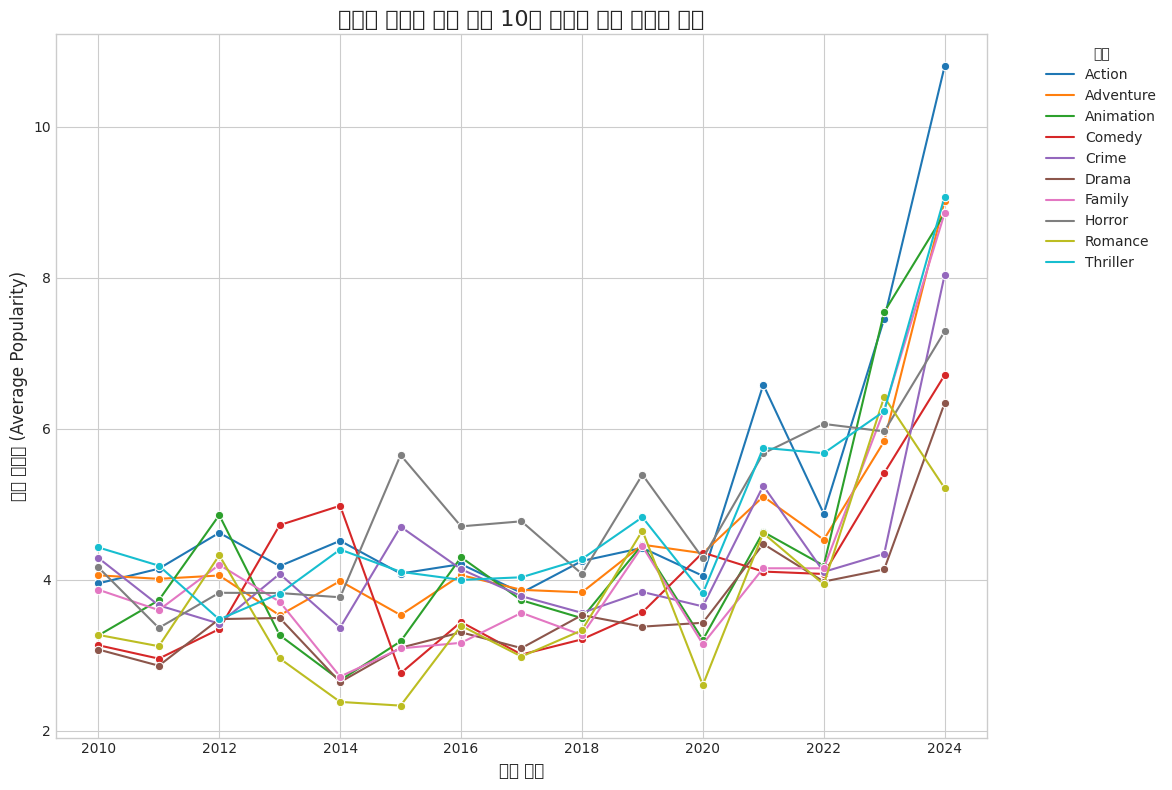

/tmp/ipykernel_37/1129830323.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_genres['decade'] = df_top_genres['year'].apply(categorize_decade)



[2/2] 시기별 장르 인기도 점유율 비교 (누적 막대 그래프)...


/tmp/ipykernel_37/1129830323.py:126: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.tight_layout(rect=[0, 0, 0.85, 1]) # 레전드 공간 확보
/tmp/ipykernel_37/1129830323.py:126: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout(rect=[0, 0, 0.85, 1]) # 레전드 공간 확보
/tmp/ipykernel_37/1129830323.py:126: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout(rect=[0, 0, 0.85, 1]) # 레전드 공간 확보
/tmp/ipykernel_37/1129830323.py:126: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout(rect=[0, 0, 0.85, 1]) # 레전드 공간 확보
/tmp/ipykernel_37/1129830323.py:126: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout(rect=[0, 0, 0.85, 1]) # 레전드 공간 확보
/tmp/ipykernel_37/1129830323.py:126: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout(rect=[0, 0, 0.85, 1]) # 레전드 

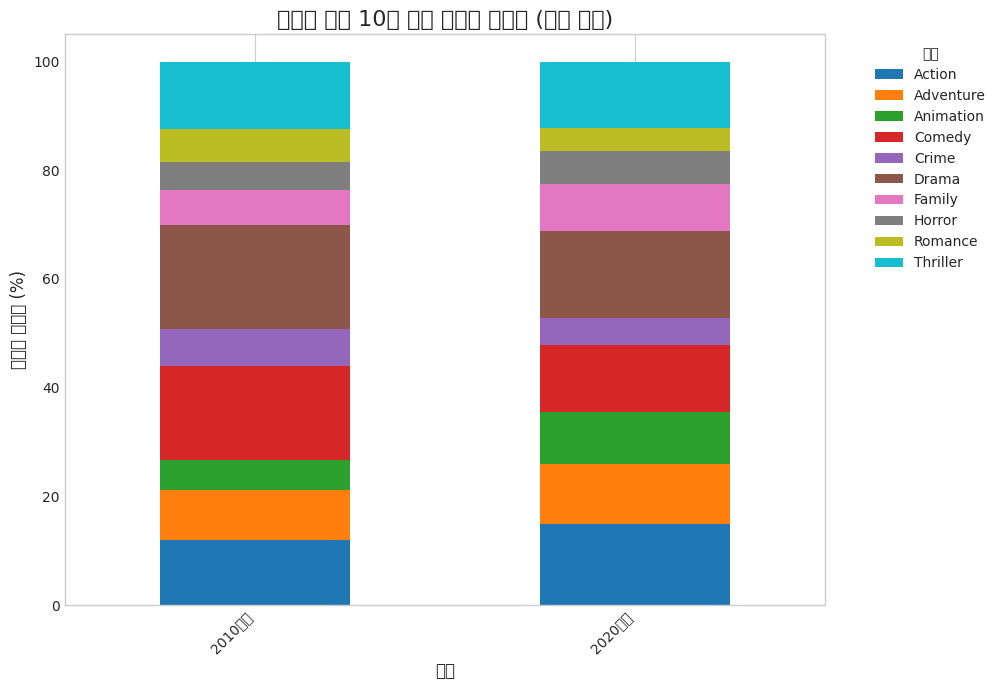


✅ 두 가지 시각화 작업이 성공적으로 완료되었습니다.

--- 스크립트 종료 ---


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- 설정 (Configuration) ---

# 이전 단계에서 저장된 Explode된 데이터 파일 경로
INPUT_FILE_PATH = '/kaggle/working/final_processed_tmdb_data_exploded.csv'

# 시각화 결과를 저장할 경로 (필요시 사용)
OUTPUT_DIR = '/kaggle/working/'

print("--- 장르별 인기 동향 시각화 스크립트 시작 ---")
print(f"입력 파일: {INPUT_FILE_PATH}")

# Matplotlib 및 Seaborn 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')

# =================================================================
# ✅ 한글 폰트 설정 부분 수정 (Kaggle/Colab 환경 대응)
# =================================================================
try:
    # 나눔 폰트 경로를 직접 지정 (일반적인 Kaggle 환경 경로)
    # 폰트가 설치되어 있어야 합니다. 만약 NanumGothic이 없으면 다른 폰트(Malgun Gothic 등)를 시도하세요.
    plt.rcParams['font.family'] = 'NanumGothic'
    
    # 폰트 캐시를 지우는 과정은 이 환경에서는 불필요하거나 복잡하므로,
    # 폰트 설정만 명확하게 지정하고 오류 방지 설정을 추가합니다.
    
    # 폰트 패밀리가 없을 경우를 대비해 예외 처리
    if 'NanumGothic' not in plt.matplotlib.font_manager.get_font_names():
        print("경고: NanumGothic 폰트가 시스템에 설치되어 있지 않을 수 있습니다. 폰트를 설치하거나 다른 폰트 이름을 사용해 주세요.")
        
except Exception as e:
    print(f"폰트 설정 중 오류 발생: {e}")
    # 기본 폰트로 되돌림
    plt.rcParams['font.family'] = 'sans-serif' 
# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False 

try:
    # 1. 데이터 로드
    df = pd.read_csv(INPUT_FILE_PATH)
    print(f"데이터 로드 완료. 총 행 수: {len(df)}")
    
    # 컬럼 이름 변경 (사용자 요청 반영: Id -> id)
    if 'Id' in df.columns:
        df.rename(columns={'Id': 'id'}, inplace=True)

    # 'popularity'와 'year' 컬럼이 유효한지 확인
    df = df.dropna(subset=['popularity', 'year', 'genres'])
    df['year'] = df['year'].astype(int)

    # --- 2. 시간의 흐름에 따른 장르별 추세 (라인 차트) ---

    print("\n[1/2] 시간의 흐름에 따른 장르별 인기도 추세 분석 (라인 차트)...")
    
    # 인기도가 너무 낮은 장르를 제외하고, 상위 10개 장르만 분석 대상으로 선정
    # genres 컬럼에서 빈 값/오류 값 정리 후 인기도 합계 기준 상위 10개 추출
    df_clean_genres = df[~df['genres'].isin(['', 'None', 'Unknown'])]
    
    top_genres = df_clean_genres.groupby('genres')['popularity'].sum().nlargest(10).index
    df_top_genres = df_clean_genres[df_clean_genres['genres'].isin(top_genres)]
    
    # 연도별, 장르별 인기도 평균 집계
    genre_trend = df_top_genres.groupby(['year', 'genres'])['popularity'].mean().reset_index()

    # 시각화
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=genre_trend, x='year', y='popularity', hue='genres', marker='o', 
                 palette=sns.color_palette("tab10", len(top_genres)))
    
    plt.title('시간의 흐름에 따른 상위 10개 장르별 평균 인기도 추세', fontsize=16)
    plt.xlabel('개봉 연도', fontsize=12)
    plt.ylabel('평균 인기도 (Average Popularity)', fontsize=12)
    plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # 레전드 공간 확보
    plt.savefig(os.path.join(OUTPUT_DIR, 'genre_popularity_trend_line_chart.png'))
    plt.show()

    # --- 3. 시기별 장르 인기도 비교 (누적 막대 그래프) ---
    
    print("\n[2/2] 시기별 장르 인기도 점유율 비교 (누적 막대 그래프)...")
    
    # 10년 단위로 시기를 구분합니다. (예: 1990s, 2000s, 2010s, 2020s)
    def categorize_decade(year):
        if year < 1980: return '1970년대 이전'
        return f"{int(year // 10) * 10}년대"
    
    df_top_genres['decade'] = df_top_genres['year'].apply(categorize_decade)
    
    # 시기별, 장르별 인기도 합계 계산
    genre_share = df_top_genres.groupby(['decade', 'genres'])['popularity'].sum().reset_index()

    # 시기별 총 인기도 계산 (비율 계산용)
    total_popularity_by_decade = genre_share.groupby('decade')['popularity'].sum()
    
    # 비율 계산
    genre_share['popularity_percentage'] = genre_share.apply(
        lambda row: (row['popularity'] / total_popularity_by_decade[row['decade']]) * 100, 
        axis=1
    )

    # 시각화
    plt.figure(figsize=(12, 7))
    
    # 누적 막대 그래프를 그리기 위해 피벗 테이블 생성
    genre_pivot = genre_share.pivot(index='decade', columns='genres', values='popularity_percentage').fillna(0)
    
    # 연대순으로 정렬
    decade_order = sorted(genre_pivot.index.unique())
    genre_pivot = genre_pivot.reindex(decade_order, axis=0)
    
    genre_pivot.plot(kind='bar', stacked=True, ax=plt.gca(), 
                     color=sns.color_palette("tab10", len(top_genres)))

    plt.title('시기별 상위 10개 장르 인기도 점유율 (누적 막대)', fontsize=16)
    plt.xlabel('시기', fontsize=12)
    plt.ylabel('인기도 점유율 (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # 레전드 공간 확보
    plt.savefig(os.path.join(OUTPUT_DIR, 'genre_popularity_share_stacked_bar_chart.png'))
    plt.show()

    print("\n✅ 두 가지 시각화 작업이 성공적으로 완료되었습니다.")

except FileNotFoundError:
    print(f"\n❌ 오류: 입력 파일({INPUT_FILE_PATH})을 찾을 수 없습니다. 이전 단계의 파일 경로를 확인해 주세요.")
except Exception as e:
    print(f"\n❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")
